<a href="https://colab.research.google.com/github/vvilliscool/ML_LIB_Class_Goorm/blob/master/goorm_20220803_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import display, Image
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

(1797, 64)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']) [0 1 2 ... 8 9 8]
[0 1 2 3 4 5 6 7 8 9]


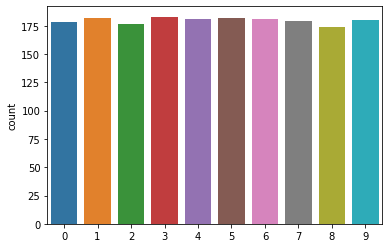

In [5]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)
print(digits.keys(), digits.target)
print(np.unique( digits.target ) )
sns.countplot(digits.target)

In [6]:
X = digits.data             # 입력  
y = digits.target == 9      # 출력

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Text(0.5, 1.0, 'test')

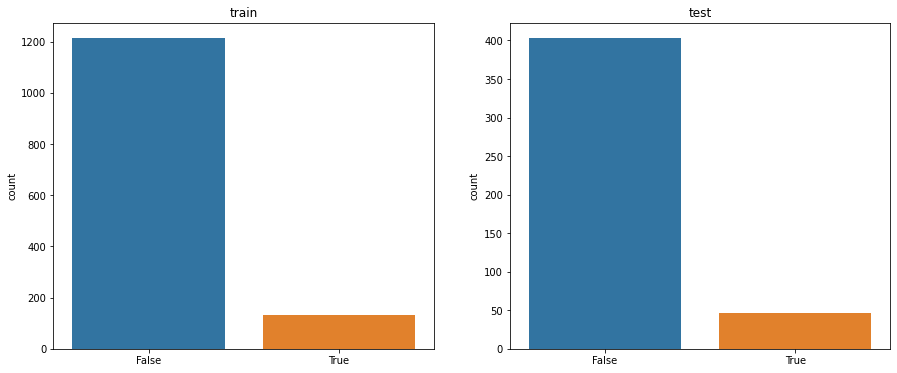

In [7]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
# y_train의 값 확인
sns.countplot(y_train)
plt.title("train")

plt.subplot(1, 2, 2)
# y_test의 값 확인
sns.countplot(y_test)
plt.title("test")

In [25]:
from sklearn.dummy import DummyClassifier
model = DummyClassifier(strategy='most_frequent')
model.fit(X_train, y_train)
pred_most = model.predict(X_test)

print('예측 값 : ', np.unique(pred_most))

예측 값 :  [False]


In [26]:
print('학습용셋 정확도 : ', model.score(X_train, y_train))
print('테스트셋 정확도 : ', model.score(X_test, y_test))

학습용셋 정확도 :  0.9012620638455828
테스트셋 정확도 :  0.8955555555555555


In [27]:
from sklearn.dummy import DummyClassifier
model = DummyClassifier(strategy='stratified')
model.fit(X_train, y_train)
pred_str = model.predict(X_test)

print('예측 값 : ', np.unique(pred_str))
print('학습용셋 정확도 : ', model.score(X_train, y_train))
print('테스트셋 정확도 : ', model.score(X_test, y_test))

예측 값 :  [False  True]
학습용셋 정확도 :  0.8270230141054195
테스트셋 정확도 :  0.8088888888888889


In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tr = model.predict(X_test)

print("예측 값 : ", np.unique(pred_tr))

print("학습용셋 정확도 : ", model.score(X_train, y_train))
print("테스트셋 정확도 : ", model.score(X_test, y_test))

예측 값 :  [False  True]
학습용셋 정확도 :  0.9383815887156645
테스트셋 정확도 :  0.9177777777777778


In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_lg = model.predict(X_test)

print("예측 값 : ", np.unique(pred_lg))

print("학습용셋 정확도 : ", model.score(X_train, y_train))
print("테스트셋 정확도 : ", model.score(X_test, y_test))

예측 값 :  [False  True]
학습용셋 정확도 :  0.9977728285077951
테스트셋 정확도 :  0.9844444444444445


## 오차행렬

In [14]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=02e27fffa4644ad4cfa309ca0f39b0455db80348d3bfba5e7667a48f3d9666fe
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [15]:
import mglearn

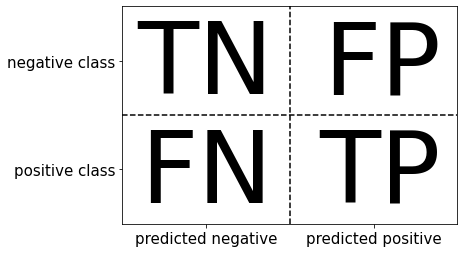

In [16]:
mglearn.plots.plot_binary_confusion_matrix()

In [31]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_lg)
print("오차 행렬:\n{}".format(confusion))

오차 행렬:
[[402   1]
 [  6  41]]


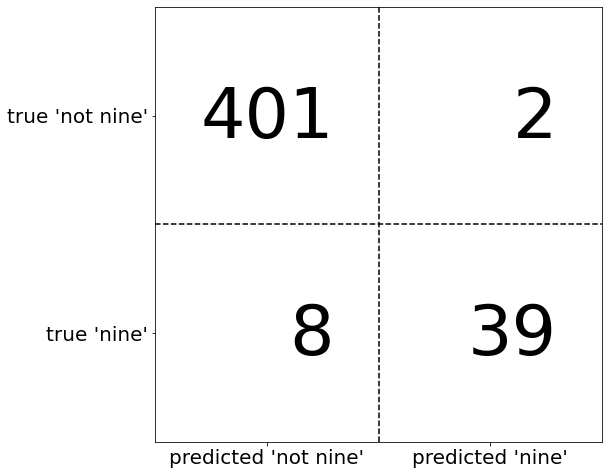

In [32]:
mglearn.plots.plot_confusion_matrix_illustration()

In [40]:
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most))

print("\n분포기반 모델:")
print(confusion_matrix(y_test, pred_str))

print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tr))

print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_lg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

분포기반 모델:
[[357  46]
 [ 40   7]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[402   1]
 [  6  41]]


# F1 score

In [41]:
from sklearn.metrics import f1_score

# 빈도기반 모델 f1-score
print("무작위 더미 모델의 f1 score: ", f1_score(y_test, pred_most))

# Dummy분류 f1-score
print("분포기반 모델의 f1 score: ", f1_score(y_test, pred_str))

# 의사결정트리
print("트리 모델의 f1 score: : ", f1_score(y_test, pred_tr))

# 로지스틱 
print("로지스틱 회귀 모델의 f1 score : : ", f1_score(y_test, pred_lg))

무작위 더미 모델의 f1 score:  0.0
분포기반 모델의 f1 score:  0.14
트리 모델의 f1 score: :  0.5542168674698795
로지스틱 회귀 모델의 f1 score : :  0.9213483146067415
